In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:

os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/input"

In [ ]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset
License(s): other
100% 242M/242M [00:14<00:00, 19.6MB/s]
100% 242M/242M [00:14<00:00, 17.4MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: flower_images/Lilly/00048a5c76.jpg  
  inflating: flower_images/Lilly/001ff6644e.jpg  
  inflating: flower_images/Lilly/001ff6656j.jpg  
  inflating: flower_images/Lilly/00973ad1b1.jpg  
  inflating: flower_images/Lilly/00a7d512d6.jpg  
  inflating: flower_images/Lilly/00f36a3c40.jpg  
  inflating: flower_images/Lilly/013628cccc.jpg  
  inflating: flower_images/Lilly/01998d6fb5.jpg  
  inflating: flower_images/Lilly/01a0ec319c.jpg  
  inflating: flower_images/Lilly/01b4bb0289.jpg  
  inflating: flower_images/Lilly/025ef3ea44.jpg  
  inflating: flower_images/Lilly/02a7a2df46.jpg  
  inflating: flower_images/Lilly/02be2ca388.jpg  
  inflating: flower_images/Lilly/035cce082f.jpg  
  inflating: flower_images/Lilly/039eba79d4.jpg  
  inflating: flower_images/Lilly/04067b91d6.jpg  
  inflating: flower_images/Lilly/04acfd5449.jpg  
  inflating: flower_images/Lilly/05777790e2.jpg  
  inflating: flower_images/Lilly/05b341b09f.jpg  
  i

In [ ]:
import os

# Ana veri dizini
base_dir = '/content/flower_images'

# Sınıf dizinlerini listele
class_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
print("Classes found:", class_dirs)

Classes found: ['Lotus', 'Sunflower', 'Lilly', 'Orchid', 'Tulip']


In [ ]:
import shutil
from sklearn.model_selection import train_test_split

# Hedef dizin
output_base_dir = '/content/Data/valid'
os.makedirs(output_base_dir, exist_ok=True)

# Belirli bir yüzde veya sayıda dosya seç
subset_ratio = 0.15  # %20'u almak için

for class_dir in class_dirs:
    # Sınıf dizinindeki dosyaları listele
    image_files = [f for f in os.listdir(os.path.join(base_dir, class_dir)) if f.endswith('.jpg')]

    # Belirli bir yüzde veya belirli sayıda dosya seç
    subset_size = int(len(image_files) * subset_ratio)
    image_subset, _ = train_test_split(image_files, train_size=subset_ratio, random_state=42)

    # Hedef sınıf dizinini oluştur
    output_class_dir = os.path.join(output_base_dir, class_dir)
    os.makedirs(output_class_dir, exist_ok=True)

    # Seçilen dosyaları kopyalayın
    for img_file in image_subset:
        src_path = os.path.join(base_dir, class_dir, img_file)
        dst_path = os.path.join(output_class_dir, img_file)
        shutil.copy(src_path, dst_path)

    print(f"{len(image_subset)} images from class '{class_dir}' have been copied to '{output_class_dir}'.")


150 images from class 'Lotus' have been copied to '/content/Data/valid/Lotus'.
150 images from class 'Sunflower' have been copied to '/content/Data/valid/Sunflower'.
149 images from class 'Lilly' have been copied to '/content/Data/valid/Lilly'.
150 images from class 'Orchid' have been copied to '/content/Data/valid/Orchid'.
150 images from class 'Tulip' have been copied to '/content/Data/valid/Tulip'.


In [ ]:
import os

def count_png_files(base_dir):
    counts = {}
    total_count = 0
    # Sınıf dizinlerini listele
    class_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    # Her sınıf dizinindeki .png dosyalarını say
    for class_dir in class_dirs:
        class_path = os.path.join(base_dir, class_dir)
        png_files = [f for f in os.listdir(class_path) if f.endswith('.png')]
        count = len(png_files)
        counts[class_dir] = count
        total_count += count

    return counts, total_count

# Ana veri dizinleri
train_dir = '/content/Data/train'
test_dir = '/content/Data/test'

# Train dizinindeki .png dosyalarını say
train_counts, train_total = count_png_files(train_dir)
print("Train directory .png file counts:")
for class_dir, count in train_counts.items():
    print(f"Class '{class_dir}' contains {count} .png files.")
print(f"Total .png files in train directory: {train_total}")

# Test dizinindeki .png dosyalarını say
test_counts, test_total = count_png_files(test_dir)
print("\nTest directory .png file counts:")
for class_dir, count in test_counts.items():
    print(f"Class '{class_dir}' contains {count} .png files.")
print(f"Total .png files in test directory: {test_total}")

# Toplam dosya sayılarını en sonda göster
print(f"\nTotal .png files in train directory: {train_total}")
print(f"Total .png files in test directory: {test_total}")


Train directory .png file counts:
Class 'Lotus' contains 0 .png files.
Class 'Sunflower' contains 0 .png files.
Class 'Lilly' contains 0 .png files.
Class 'Orchid' contains 0 .png files.
Class 'Tulip' contains 0 .png files.
Total .png files in train directory: 0

Test directory .png file counts:
Class 'Lotus' contains 0 .png files.
Class 'Sunflower' contains 0 .png files.
Class 'Lilly' contains 0 .png files.
Class 'Orchid' contains 0 .png files.
Class 'Tulip' contains 0 .png files.
Total .png files in test directory: 0

Total .png files in train directory: 0
Total .png files in test directory: 0


In [ ]:

#Verileri okutmak için path komutunu kullanıyoruz
train_dir = Path('/content/Data/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/content/Data/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/Data/val')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

def proc_img(filepath):
    #Veri setinde klasör adlarını kullanarak dataframemizi etiketliyoruz
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    df = pd.concat([filepath, labels], axis=1)

    df = df.sample(frac=1).reset_index(drop = True)

    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

In [ ]:
# Etiketleme ve veri setini kontrol için basit veritabanı kodları kullanımı
print(f'Resim Sayısı: {train_df.shape[0]}\n')
print(f'Farklı Etiket Sayısı: {len(train_df.Label.unique())}\n')
print(f'Etiket İsimleri: {train_df.Label.unique()}')
train_df.head(5)

Resim Sayısı: 3999

Farklı Etiket Sayısı: 5

Etiket İsimleri: ['Sunflower' 'Lotus' 'Lilly' 'Tulip' 'Orchid']


,Filepath,Label
0,/content/Data/train/Sunflower/e6449c780f.jpg,Sunflower
1,/content/Data/train/Sunflower/3c0f5aa636.jpg,Sunflower
2,/content/Data/train/Lotus/093ed8029f.jpg,Lotus
3,/content/Data/train/Lilly/ce78da827a.jpg,Lilly
4,/content/Data/train/Tulip/158bc67b8d.jpg,Tulip


In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False)

Found 3999 validated image filenames belonging to 5 classes.
Found 999 validated image filenames belonging to 5 classes.
Found 999 validated image filenames belonging to 5 classes.


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
input_shape=(224, 224, 3),
include_top=False,
weights='imagenet',
pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(65, activation='relu')(x)
x = tf.keras.layers.Dense(30, activation='relu')(x)

outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=4,
            restore_best_weights=True)])


Epoch 1/15
125/125 [==============================] - 25s 167ms/step - loss: 0.6623 - accuracy: 0.7542 - val_loss: 0.2965 - val_accuracy: 0.8789
Epoch 2/15
125/125 [==============================] - 19s 149ms/step - loss: 0.2999 - accuracy: 0.8962 - val_loss: 0.2016 - val_accuracy: 0.9299
Epoch 3/15
125/125 [==============================] - 18s 148ms/step - loss: 0.2103 - accuracy: 0.9267 - val_loss: 0.1777 - val_accuracy: 0.9319
Epoch 4/15
125/125 [==============================] - 18s 144ms/step - loss: 0.1512 - accuracy: 0.9440 - val_loss: 0.0831 - val_accuracy: 0.9740
Epoch 5/15
125/125 [==============================] - 18s 142ms/step - loss: 0.0924 - accuracy: 0.9715 - val_loss: 0.1230 - val_accuracy: 0.9530
Epoch 6/15
125/125 [==============================] - 19s 153ms/step - loss: 0.0731 - accuracy: 0.9742 - val_loss: 0.0444 - val_accuracy: 0.9880
Epoch 7/15
125/125 [==============================] - 18s 142ms/step - loss: 0.0409 - accuracy: 0.9862 - val_loss: 0.0324 - val_ac

In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Tahmin Doğruluk Oranı: {100*acc:.2f}%')

32/32 [==============================] - 5s 127ms/step
Tahmin Doğruluk Oranı: 97.90%


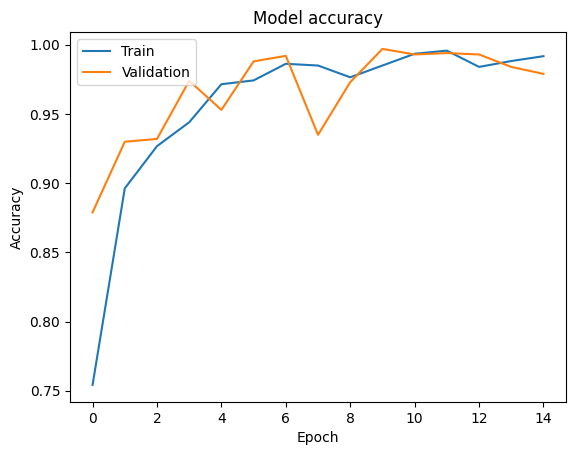

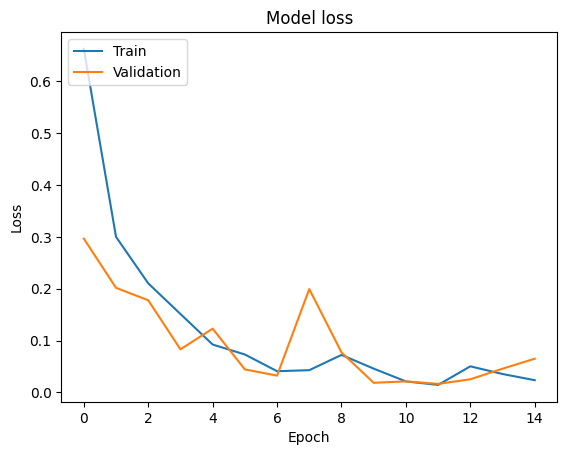

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

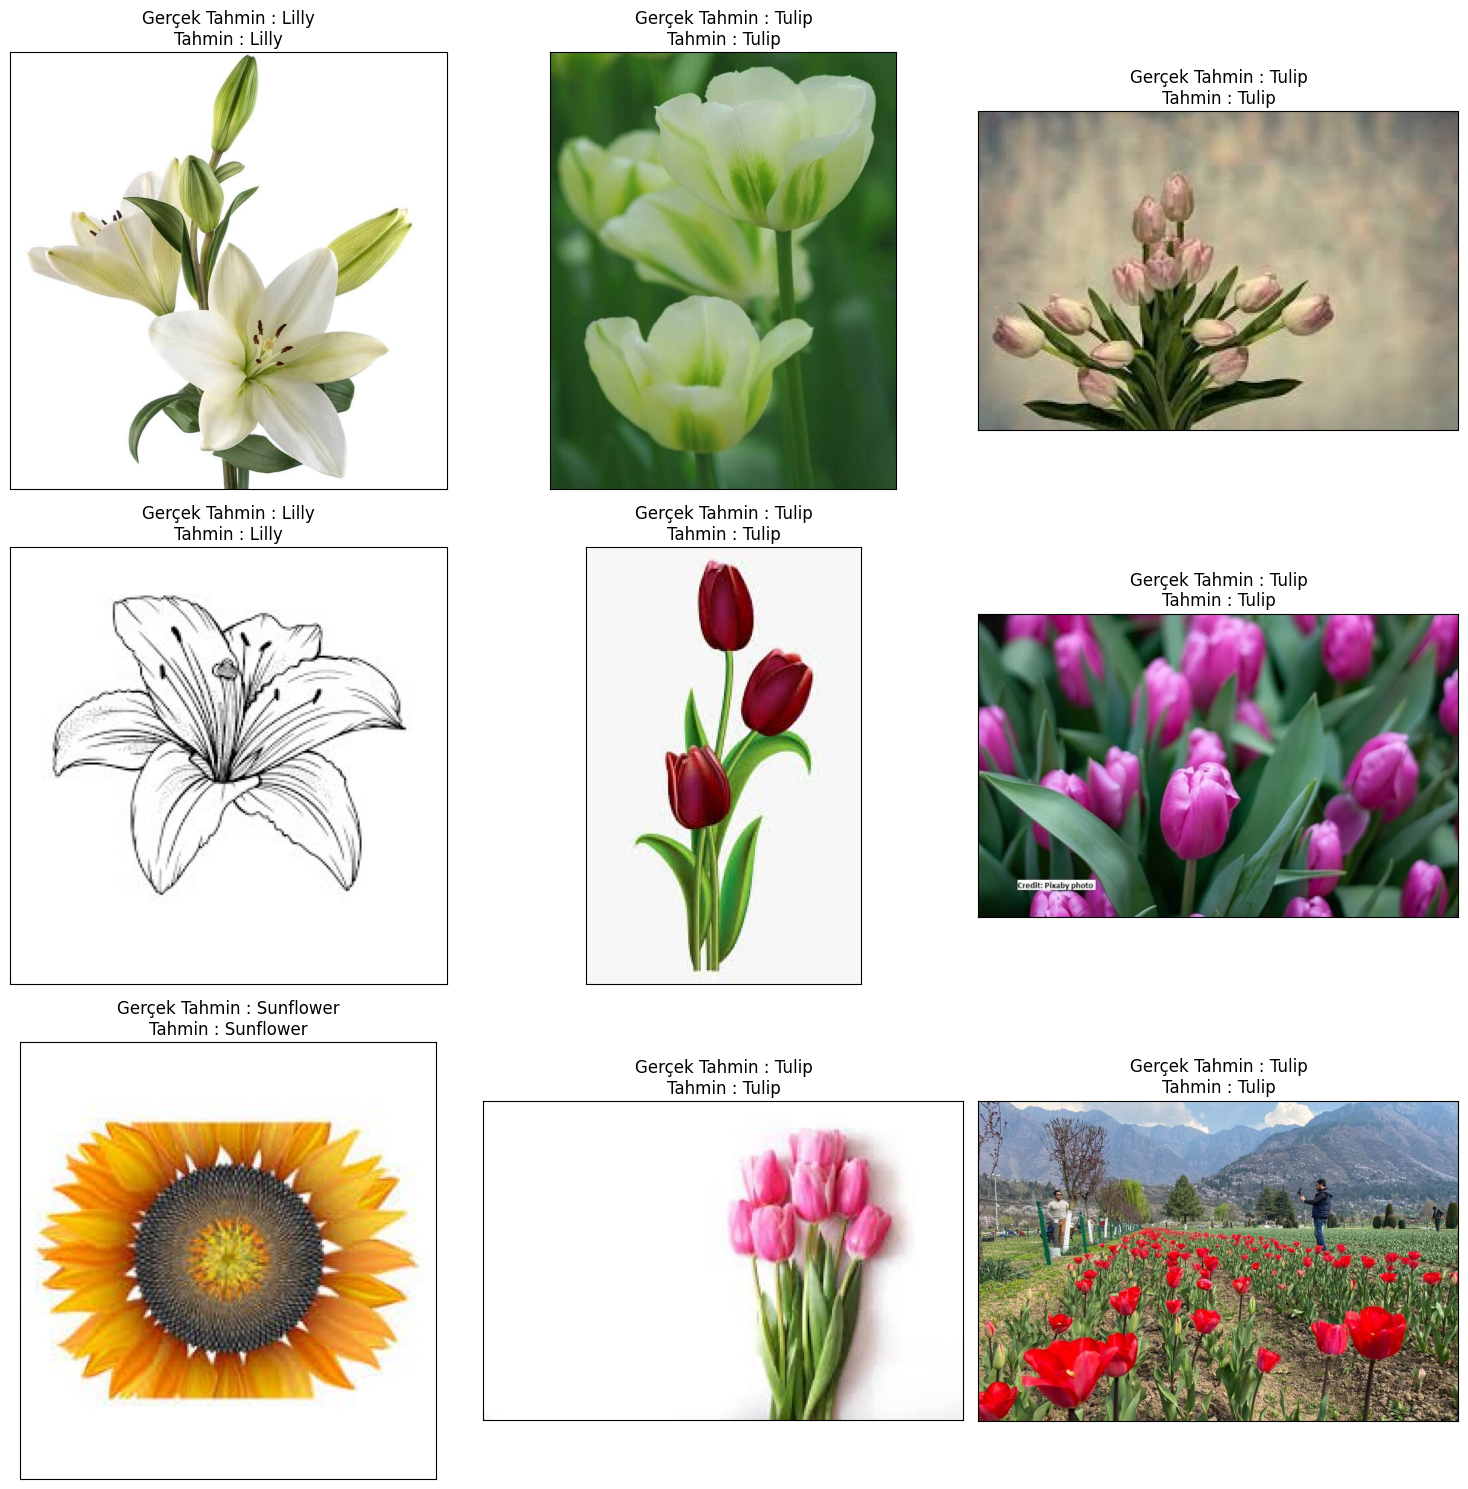

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"Gerçek Tahmin : {test_df.Label.iloc[i]}\nTahmin : {pred[i]}")
plt.tight_layout()
plt.show()